In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import folium

In [19]:
# 내부에 결과를 출력하도록 설정
%matplotlib inline

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')

In [20]:
train = pd.read_csv("/Users/kimmiso/Desktop/Dataworkspace/bus_predict/train_.csv")

In [21]:
test = pd.read_csv("/Users/kimmiso/Desktop/Dataworkspace/bus_predict/test.csv")

In [22]:
object_columns = list(train.columns[train.dtypes == 'object'])
train = train.drop(object_columns, axis='columns')

In [23]:
object_columns = list(test.columns[test.dtypes == 'object'])
test = test.drop(object_columns, axis='columns')

In [24]:
test

,Unnamed: 0,Unnamed: 0.1,id,route_id,vh_id,route_nm,now_latitude,now_longitude,distance,next_latitude,...,weather,school,transfer,dis_jeju1,dis_jeju2,time_group_,time_group_evening,time_group_morning,day_group_,day_group_end
0,0,0,210457,405136001,7997025,360,33.457724,126.554014,333.0,33.458783,...,0,0,0,5.588595,21.996547,1,0,0,1,0
1,1,1,210458,405136001,7997025,360,33.458783,126.557353,415.0,33.459893,...,0,0,0,5.658956,22.110671,1,0,0,1,0
2,2,2,210459,405136001,7997025,360,33.478867,126.483833,417.0,33.478850,...,0,0,0,4.357694,25.303390,1,0,0,1,0
3,3,3,210460,405136001,7997025,360,33.478850,126.488350,334.0,33.480700,...,0,0,0,4.017162,25.189814,1,0,0,1,0
4,4,4,210461,405136001,7997025,360,33.480700,126.489933,550.0,33.482077,...,0,0,0,3.776572,25.350760,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,91769,91769,302350,405328102,7983486,281,33.493625,126.534764,272.0,33.495540,...,0,0,0,1.368248,26.066474,1,0,0,1,0
91770,91770,91770,302351,405328102,7983486,281,33.495540,126.532907,447.0,33.498925,...,0,0,0,1.106971,26.293046,1,0,0,1,0
91771,91771,91771,302352,405328102,7983486,281,33.498925,126.530351,418.0,33.500473,...,0,0,0,0.734371,26.689053,1,0,0,1,0
91772,91772,91772,302353,405328102,7983486,281,33.500473,126.527103,140.0,33.500228,...,0,0,0,0.404809,26.890796,1,0,0,1,0


In [31]:
X = train.drop(['next_arrive_time'], axis='columns').values

In [32]:
Y = train['next_arrive_time'].values

In [71]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)

In [62]:
# model의 중요변수

imp = model.feature_importances_

imp 

array([0.00130517, 0.        , 0.        , 0.01752961, 0.00342116,
       0.01241627, 0.03163478, 0.15334843, 0.3782802 , 0.08094848,
       0.06711762, 0.0013244 , 0.01952719, 0.04017156, 0.11200728,
       0.05652184, 0.01556303, 0.00240672, 0.00470498, 0.00177118,
       0.        ], dtype=float32)

([<matplotlib.axis.YTick at 0x7f863096efa0>,
 [Text(0, 0, 'Unnamed: 0'),
  Text(0, 1, 'Unnamed: 0.1'),
  Text(0, 2, 'id'),
  Text(0, 3, 'route_id'),
  Text(0, 4, 'vh_id'),
  Text(0, 5, 'route_nm'),
  Text(0, 6, 'now_latitude'),
  Text(0, 7, 'now_longitude'),
  Text(0, 8, 'distance'),
  Text(0, 9, 'next_latitude'),
  Text(0, 10, 'next_longitude'),
  Text(0, 11, 'next_arrive_time'),
  Text(0, 12, 'weather'),
  Text(0, 13, 'school'),
  Text(0, 14, 'transfer'),
  Text(0, 15, 'dis_jeju1'),
  Text(0, 16, 'dis_jeju2'),
  Text(0, 17, 'time_group_'),
  Text(0, 18, 'time_group_evening'),
  Text(0, 19, 'time_group_morning'),
  Text(0, 20, 'day_group_'),
  Text(0, 21, 'day_group_end')])

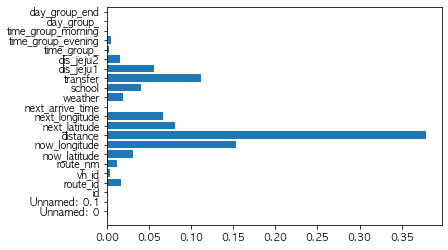

In [64]:
import matplotlib.pyplot as plt

plt.barh(range(21), imp) # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(range(22), train.columns) # 축 이름

In [72]:
# fitting RFR

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [73]:
Y_pred = regressor.predict(X_test)

result = pd.DataFrame({'pred' : Y_pred, 'real': Y_test})

In [50]:
result

,pred,real
0,24.22,26
1,97.74,122
2,53.50,46
3,33.94,22
4,202.36,94
...,...,...
10503,51.20,92
10504,43.72,94
10505,63.48,60
10506,82.14,98


In [51]:
# model 평가: mse
from sklearn.metrics import mean_squared_error 


mse = mean_squared_error(Y_test, Y_pred)
print('mse=', mse)

# model 평가2: 상관관계 -

cor = result['real'].corr(result['pred'])
cor # 0.984192504413277

mse= 1424.898938846593


In [53]:
# model 평가2: 상관관계 -

cor = result['real'].corr(result['pred'])
cor # 0.984192504413277

0.8103498839477802

In [77]:
# 중요도가 높은 변수만 넣기

X = train[['dis_jeju2','dis_jeju1', 'transfer', 'school', 'school',
          'next_longitude', 'next_latitude', 'distance', 'now_longitude']].values

Y = train['next_arrive_time'].values

test_x = test[['dis_jeju2','dis_jeju1', 'transfer', 'school', 'school',
          'next_longitude', 'next_latitude', 'distance', 'now_longitude']].values


In [74]:
result

,pred,real
0,51.702608,58
1,116.800630,102
2,43.739956,52
3,68.891925,90
4,36.842105,42
...,...,...
10503,41.245810,48
10504,99.740387,46
10505,125.885377,72
10506,133.010552,68


In [75]:
# model 평가: mse
from sklearn.metrics import mean_squared_error 


mse = mean_squared_error(Y_test, Y_pred)
print('mse=', mse)

# model 평가2: 상관관계 -

cor = result['real'].corr(result['pred'])
cor # 0.984192504413277

mse= 1059.7641751737797


0.8676631245287916

참고 문헌 
https://for-my-wealthy-life.tistory.com/24

In [79]:
test_y = regressor.predict(test_x)

result = pd.DataFrame({'id' : test['id'], 'next_arrive_time': test_y})


In [87]:
result = result.to_csv("/Users/kimmiso/Desktop/Dataworkspace/bus_predict/제출.csv")

In [85]:
result = result.set_index("id")

In [86]:
result

,next_arrive_time
id,
210457,36.842105
210458,48.028459
210459,123.540530
210460,60.076238
210461,151.203934
...,...
302350,100.318771
302351,72.464802
302352,116.821886
